In [2]:
import pandas as pd
import numpy as np
import pydicom 
import os
import matplotlib.pyplot as plt

from skimage.measure import label,regionprops
from skimage.segmentation import clear_border

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [5]:
def load_scans(path):
    slices = [pydicom.dcmread(path + '/' + file) for file in os.listdir(path)]
    slices.sort(key = lambda x : float(x.ImagePositionPatient[2]))
    return slices

In [6]:
example = 'train/' + train['Patient'][0]

(-0.5, 511.5, 511.5, -0.5)

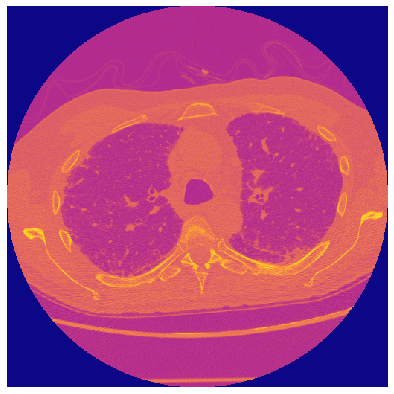

In [7]:
plt.figure(figsize=(7,7))
plt.imshow(load_scans(example)[19].pixel_array, cmap='plasma')
plt.axis('off')

In [8]:
example_img = load_scans(example)[5].pixel_array

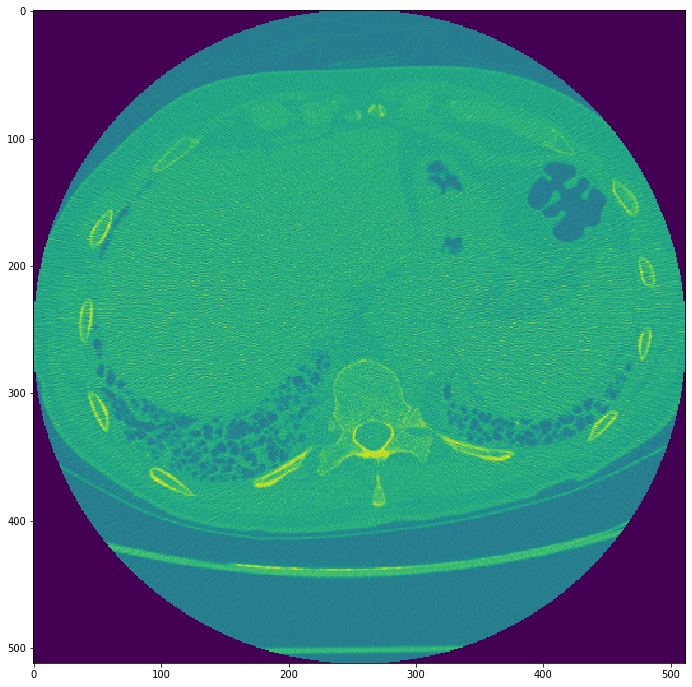

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(example_img)

Text(0.5, 1.0, 'Binary Mask Image')

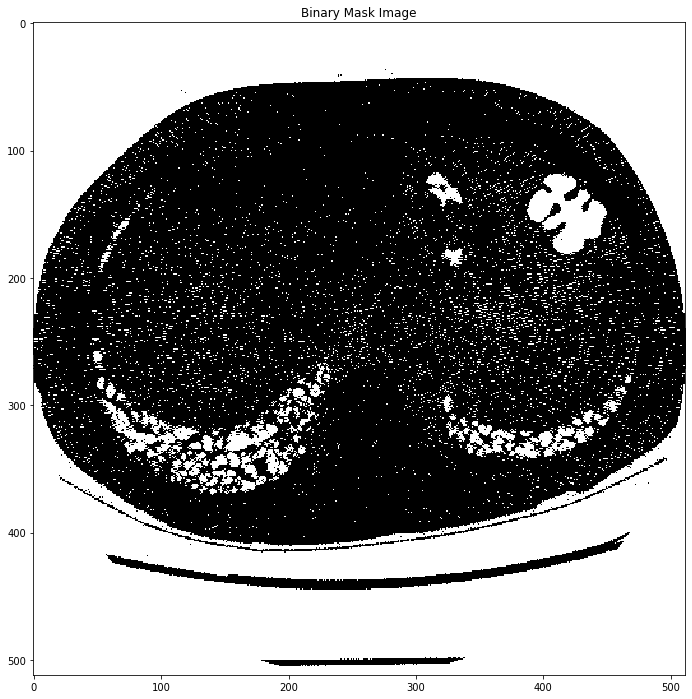

In [10]:
img = (example_img + load_scans(example)[15].RescaleIntercept) / load_scans(example)[15].RescaleSlope
img = img < -400 #HU unit range for lungs CT SCAN

plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
plt.title('Binary Mask Image')

In [11]:
img = clear_border(img)

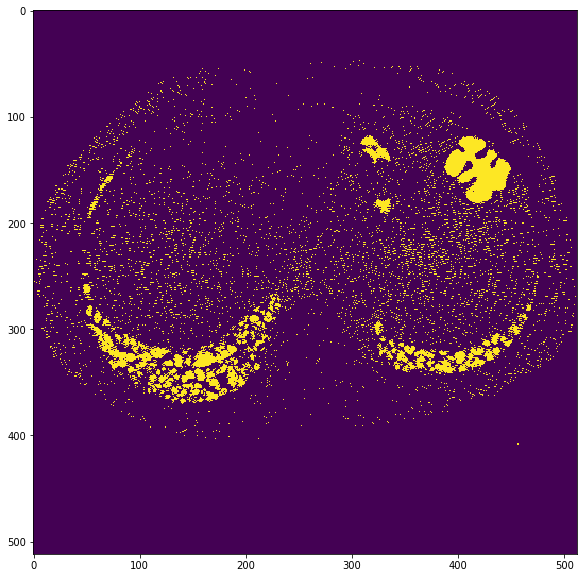

In [12]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(img)

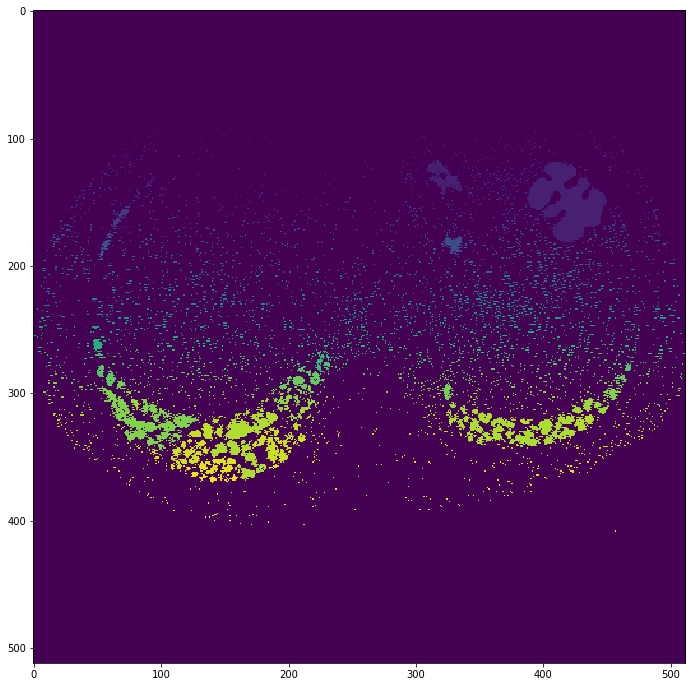

In [13]:
img = label(img)

fig = plt.figure(figsize=(12, 12))

plt.imshow(img)

In [14]:
areas = [r.area for r in regionprops(img)]
areas.sort()
if len(areas) > 2:
    for region in regionprops(img):
        if region.area < areas[-2]:
            for coordinates in region.coords:                
                img[coordinates[0], coordinates[1]] = 0
img = img > 0

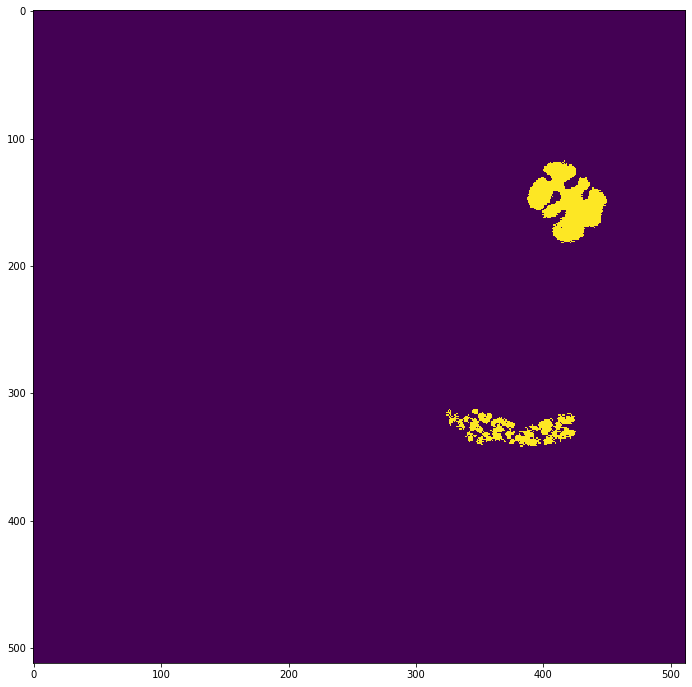

In [15]:
fig = plt.figure(figsize=(12, 12))

plt.imshow(img)

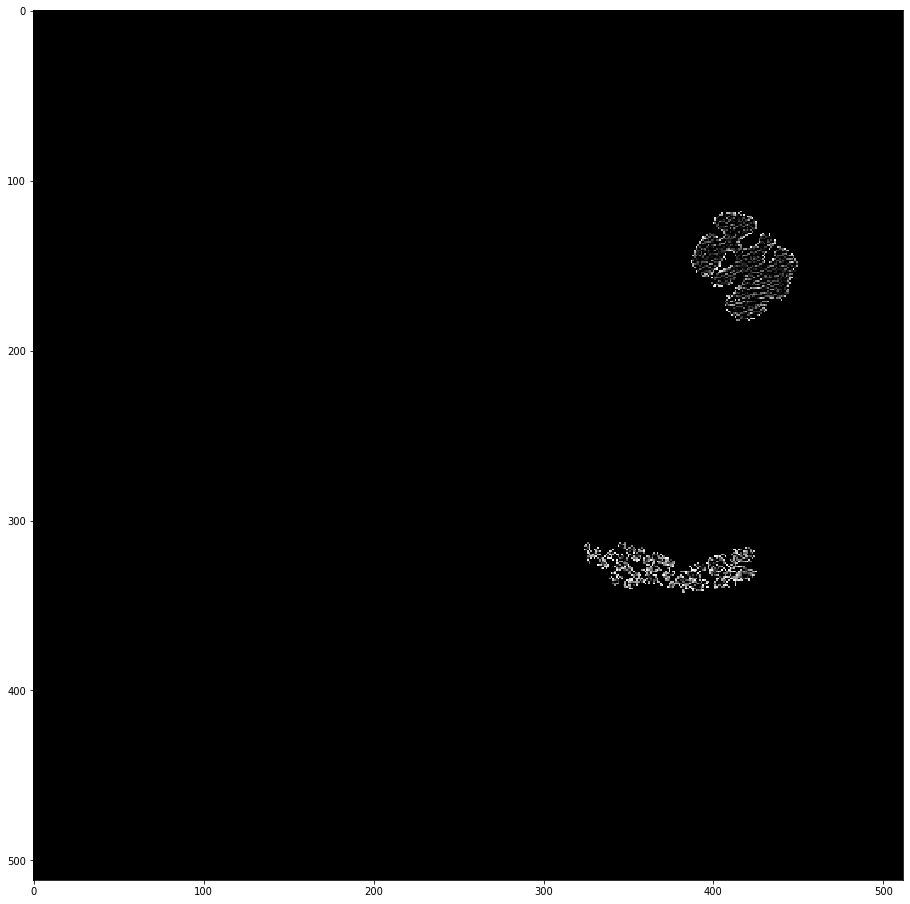

In [16]:
fig = plt.figure(figsize=(16, 16))
plt.imshow(img*example_img, cmap='gray')


In [40]:
df = pd.DataFrame(index = train['Patient'].unique(),columns=['Age', 'Male', 'Female', 'NeverSmoked','ExSmoker', 'Smokes' , 'CT', 'Week', 'FVC', 'Percentage'])

In [43]:
for iden in df.index:
    df.loc[iden, 'Age']=train[train.Patient == iden].Age.iloc[0]

In [44]:
for iden in df.index:
    df.loc[iden, 'NeverSmoked']=1 if train[train.Patient == iden].SmokingStatus.iloc[0] == 'Never smoked' else 0
    df.loc[iden, 'ExSmoker']=1 if train[train.Patient == iden].SmokingStatus.iloc[0] == 'Ex-smoker' else 0
    df.loc[iden, 'Smokes']=1 if train[train.Patient == iden].SmokingStatus.iloc[0] == 'Currently smokesS' else 0

In [45]:
for iden in df.index:
    df.loc[iden, 'Male']=1 if train[train.Patient == iden].Sex.iloc[0] == 'Male' else 0
    df.loc[iden, 'Female']=1 if train[train.Patient == iden].Sex.iloc[0] == 'Female' else 0

In [46]:
df

,Age,Male,Female,NeverSmoked,ExSmoker,Smokes,CT,Week,FVC,Percentage
ID00007637202177411956430,79,1,0,0,1,0,NaN,NaN,NaN,NaN
ID00009637202177434476278,69,1,0,0,1,0,NaN,NaN,NaN,NaN
ID00010637202177584971671,60,1,0,0,1,0,NaN,NaN,NaN,NaN
ID00011637202177653955184,72,1,0,0,1,0,NaN,NaN,NaN,NaN
ID00012637202177665765362,65,1,0,1,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
ID00419637202311204720264,73,1,0,0,1,0,NaN,NaN,NaN,NaN
ID00421637202311550012437,68,1,0,0,1,0,NaN,NaN,NaN,NaN
ID00422637202311677017371,73,1,0,0,1,0,NaN,NaN,NaN,NaN
ID00423637202312137826377,72,1,0,0,1,0,NaN,NaN,NaN,NaN


In [39]:
train

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked
